In [ ]:
# Import libraries
import numpy as np                # For mathematical matrices computing
import matplotlib.pyplot as plt   # For mathematical plotting
from random import randint

In [ ]:
# Import methods from Keras
from keras.datasets import cifar100
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Store data from URL
(train_set, train_target), (test_set, test_target) = cifar100.load_data()

# Dataset sizes
print("Train set size:", train_set.shape)
print("Test set size:", test_set.shape)

169001437/169001437 [==============================] - 2s 0us/step
Train set size: (50000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)


In [ ]:
# Targets
print("Train targets:\n", np.unique(train_target))
print("Test targets:\n", np.unique(test_target))

Train targets:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Test targets:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


100 classes overall

In [ ]:
# Fine labels of CIFAR100
# Ref. source: https://gist.github.com/adam-dziedzic/4322df7fc26a1e75bee3b355b10e30bc
fine_labels = [
    'apple',  # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm',
]

In [ ]:
# Name the numeric classes by using text file
class_names = {}
counter = 0       # For indexing keys

# Add keys and references
for instances in fine_labels:
  class_names.update({counter: instances})   # Add to dictionary
  counter+=1    # Update counter

In [ ]:
class_names

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'computer_keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 

Object: wardrobe


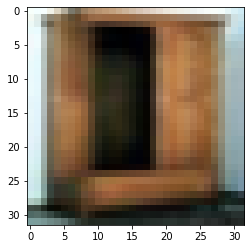

In [ ]:
# Display instance in training set
chosen_idx = randint(0, 50000)
chosen_img = train_set[chosen_idx]
chosen_target = int(train_target[chosen_idx])

# Display
print("Object:", class_names[chosen_target])
plt.imshow(chosen_img)
plt.show()

In [ ]:
# Data and targets processing
one_hot_target_train = to_categorical(train_target)    # One-hot encoding train targets
one_hot_target_test  = to_categorical(test_target)     # One-hot encoding test targets

# Normalize train and test images
train_set = train_set.astype('float32')   # Train set
train_set = train_set[:, :, :, :]/255

test_set = test_set.astype('float32')     # Test set
test_set = test_set[:, :, :, :]/255

In [ ]:
# Flatten out image
train_set = train_set.reshape(50000, 1024*3, 1)
test_set  = test_set.reshape(10000, 1024*3, 1)

In [ ]:
# Create Sequential model
model_cifar100 = Sequential()
model_cifar100 .add(Dense(1024*3, input_shape=(32*32*3,), activation='relu'))
model_cifar100 .add(Dense(1024, activation='relu'))
model_cifar100 .add(Dense(1024*3, activation='relu'))
model_cifar100 .add(Dense(512, activation='relu'))
model_cifar100 .add(Dense(100, activation='softmax'))

# Model Summary
model_cifar100 .summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_39 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_40 (Dense)            (None, 3072)              3148800   
                                                                 
 dense_41 (Dense)            (None, 512)               1573376   
                                                                 
 dense_42 (Dense)            (None, 100)               51300     
                                                                 
Total params: 17,360,484
Trainable params: 17,360,484
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model and train
model_cifar100 .compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_cifar100 .fit(train_set, one_hot_target_train, epochs=100, batch_size=500)

# Test set evaluation
test_loss, test_acc = model_cifar100.evaluate(test_set, one_hot_target_test)
print('Test Loss:', test_loss)
print('Test Acc.:', test_acc)

Epoch 1/100
100/100 [==============================] - 105s 1s/step - loss: 4.6280 - accuracy: 0.0212
Epoch 2/100
100/100 [==============================] - 102s 1s/step - loss: 4.2630 - accuracy: 0.0445
Epoch 3/100
100/100 [==============================] - 103s 1s/step - loss: 4.1276 - accuracy: 0.0621
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 4.0228 - accuracy: 0.0777
Epoch 5/100
100/100 [==============================] - 104s 1s/step - loss: 3.9273 - accuracy: 0.0925
Epoch 6/100
100/100 [==============================] - 105s 1s/step - loss: 3.8375 - accuracy: 0.1099
Epoch 7/100
100/100 [==============================] - 104s 1s/step - loss: 3.7321 - accuracy: 0.1251
Epoch 8/100
100/100 [==============================] - 104s 1s/step - loss: 3.6573 - accuracy: 0.1385
Epoch 9/100
100/100 [==============================] - 104s 1s/step - loss: 3.5815 - accuracy: 0.1497
Epoch 10/100
100/100 [==============================] - 104s 1s/step - loss: 3.509

In [ ]:
# Save model
model_cifar100.save('/content/model_cifar100.h5')   # 4 Layers - 100 epochs

**TRY ON TEST SET**

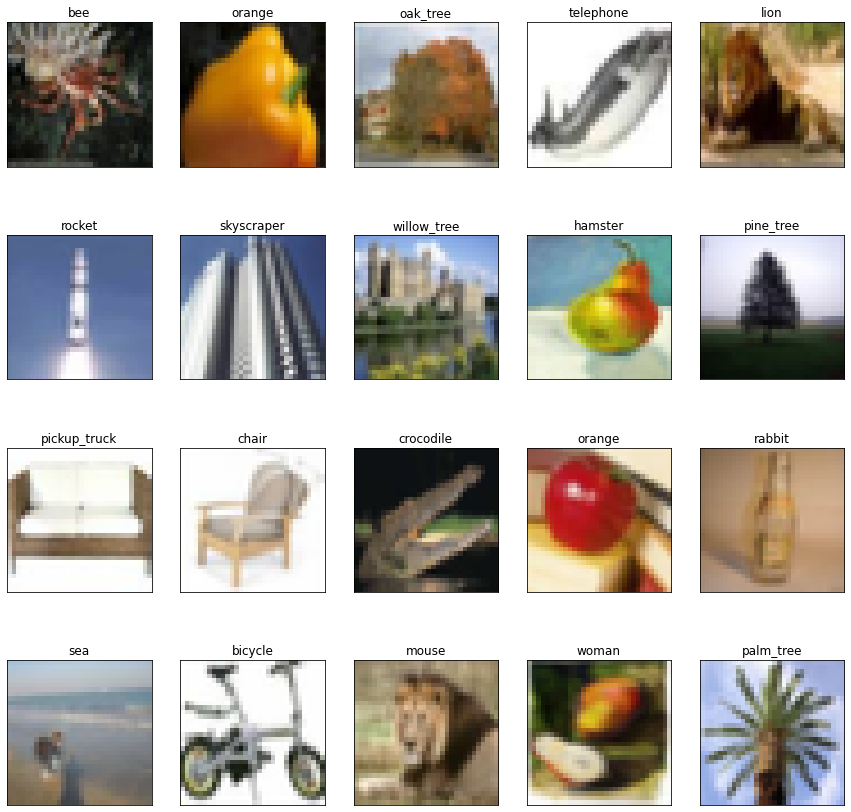

In [ ]:
# Test image
figure = plt.figure(figsize=[15, 15])

for indx in range(100, 120, 1):
  chosen_img  = test_set[indx, :, :].reshape(1, -1)      # Choose an instance
  predict_num = np.argmax(model_cifar100.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(4, 5, (indx+1)-100)
  axes.imshow(chosen_img.reshape(32, 32, 3))
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_names.keys():
    if predict_num == keys:
      plt.title(class_names[keys])
      break
    else:
      continue

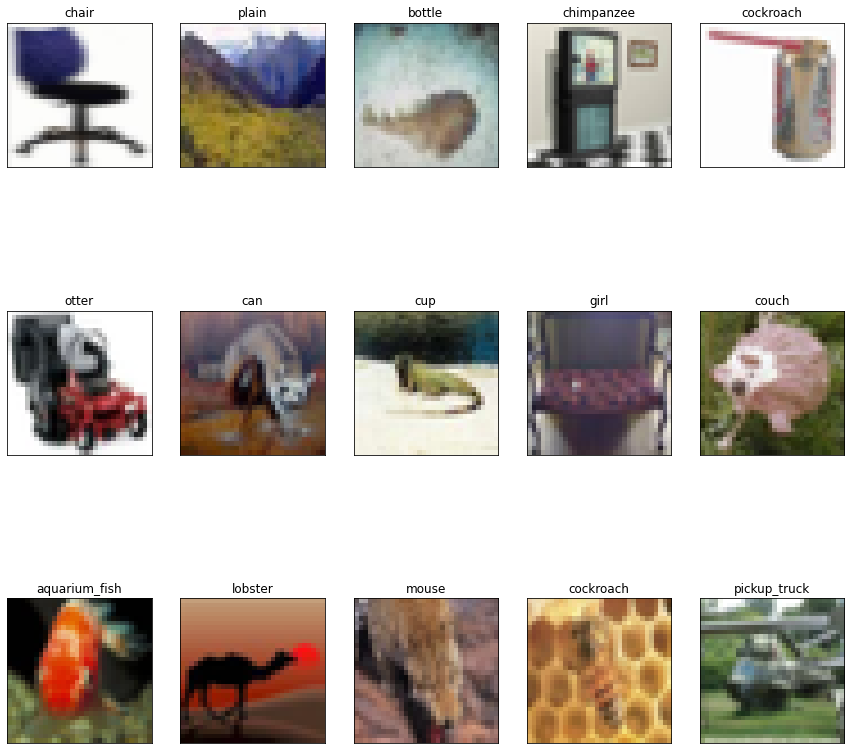

In [ ]:
# Test image
figure = plt.figure(figsize=[15, 15])

for indx in range(9600, 9615, 1):
  chosen_img  = test_set[indx, :, :].reshape(1, -1)      # Choose an instance
  predict_num = np.argmax(model_cifar100.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(3, 5, (indx+1)-9600)
  axes.imshow(chosen_img.reshape(32, 32, 3))
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_names.keys():
    if predict_num == keys:
      plt.title(class_names[keys])
      break
    else:
      continue

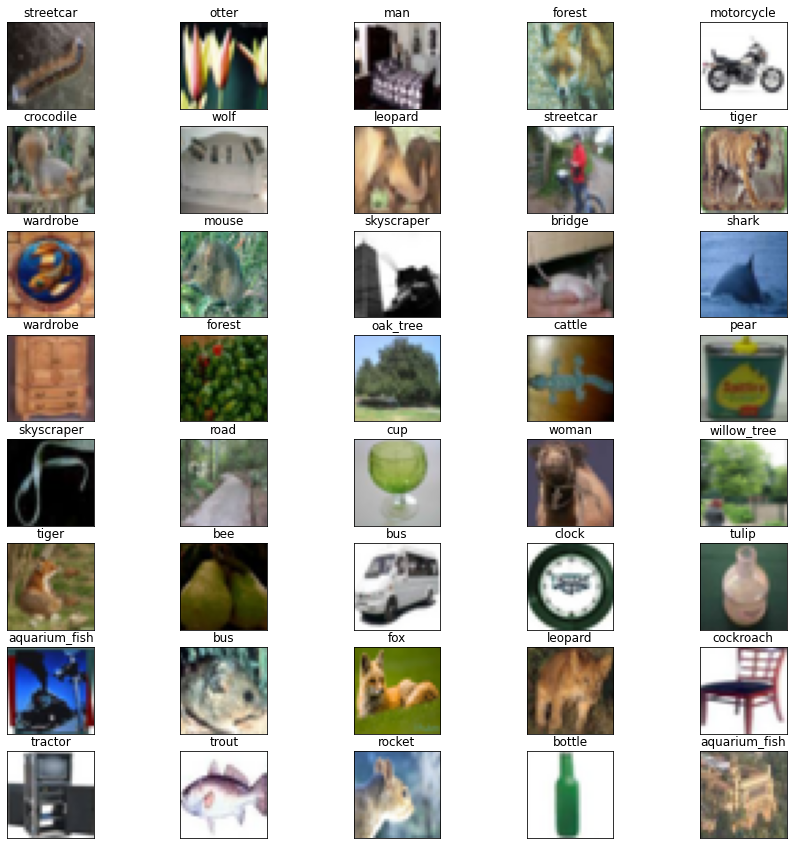

In [ ]:
# Test image
figure = plt.figure(figsize=[15, 15])

for indx in range(1400, 1440, 1):
  chosen_img  = test_set[indx, :, :].reshape(1, -1)      # Choose an instance
  predict_num = np.argmax(model_cifar100.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(8, 5, (indx+1)-1400)
  axes.imshow(chosen_img.reshape(32, 32, 3))
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_names.keys():
    if predict_num == keys:
      plt.title(class_names[keys])
      break
    else:
      continue

As we can see, the picture with no background or less colors can be detected accurately. Due to our ANN trained directly on pixel values, thus make it tend to overfit only the images that are used to train and perform badly on the test image

**TEST ON TRAIN SET**

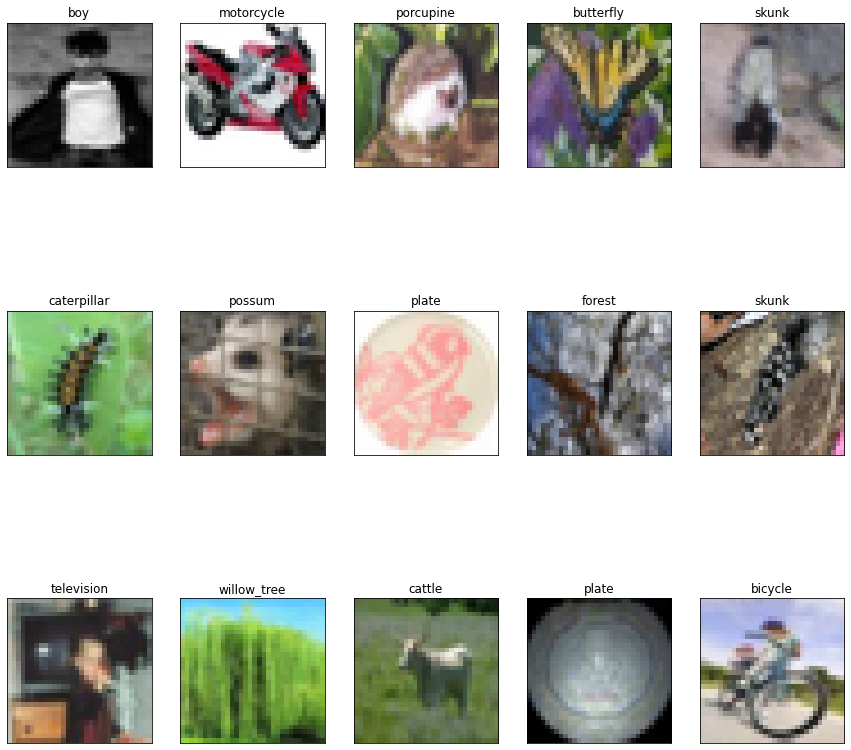

In [ ]:
# Test image
figure = plt.figure(figsize=[15, 15])

for indx in range(9600, 9615, 1):
  chosen_img  = train_set[indx, :, :].reshape(1, -1)      # Choose an instance
  predict_num = np.argmax(model_cifar100.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(3, 5, (indx+1)-9600)
  axes.imshow(chosen_img.reshape(32, 32, 3))
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_names.keys():
    if predict_num == keys:
      plt.title(class_names[keys])
      break
    else:
      continue